TASK 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tqdm import tqdm
import scipy

In [3]:
train = pd.read_csv("train.csv")
oil = pd.read_csv("oil.csv")
stores = pd.read_csv("stores.csv")
holidays = pd.read_csv("holidays_events.csv")

In [4]:
train['date'] = pd.to_datetime(train['date'], errors='coerce')
oil['date'] = pd.to_datetime(oil['date'], errors='coerce')
holidays['date'] = pd.to_datetime(holidays['date'], errors='coerce')

In [5]:
print(train.info())
print(train.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27509 entries, 0 to 27508
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           27509 non-null  int64         
 1   date         27508 non-null  datetime64[ns]
 2   store_nbr    27508 non-null  float64       
 3   family       27508 non-null  object        
 4   sales        27508 non-null  float64       
 5   onpromotion  27508 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 1.3+ MB
None
   id       date  store_nbr      family  sales  onpromotion
0   0 2013-01-01        1.0  AUTOMOTIVE    0.0          0.0
1   1 2013-01-01        1.0   BABY CARE    0.0          0.0
2   2 2013-01-01        1.0      BEAUTY    0.0          0.0
3   3 2013-01-01        1.0   BEVERAGES    0.0          0.0
4   4 2013-01-01        1.0       BOOKS    0.0          0.0


In [6]:
print(train.isnull().sum())

id             0
date           1
store_nbr      1
family         1
sales          1
onpromotion    1
dtype: int64


In [8]:
train['sales'] = train['sales'].fillna(train['sales'].median())
oil['dcoilwtico'] = oil['dcoilwtico'].ffill

In [9]:
train = train.merge(oil, on='date', how='left')
train = train.merge(holidays[['date','type']], on='date', how='left')

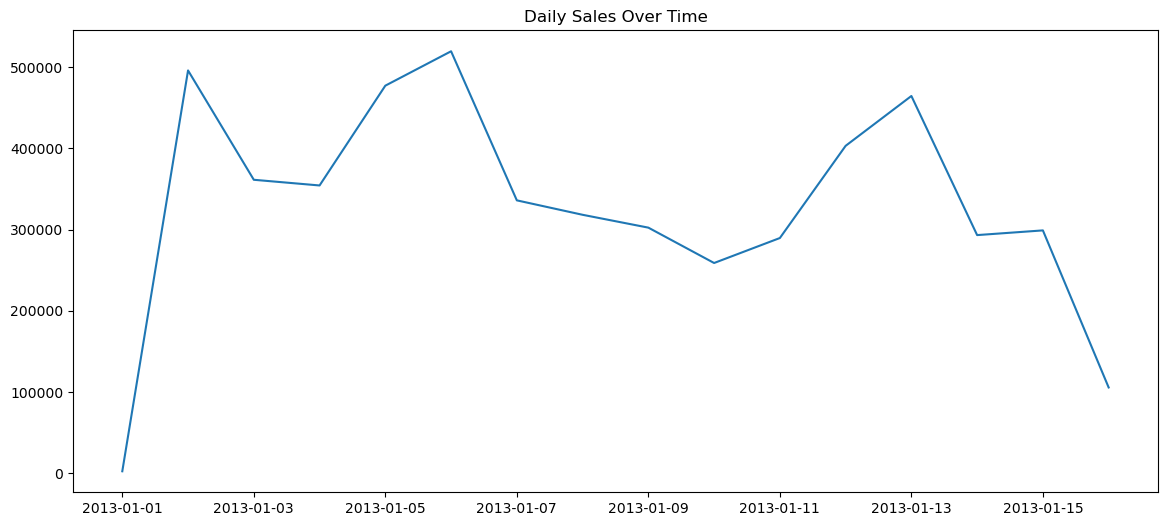

In [11]:
daily_sales = train.groupby('date')['sales'].sum().reset_index()
plt.figure(figsize=(14,6))
plt.plot(daily_sales['date'], daily_sales['sales'])
plt.title("Daily Sales Over Time")
plt.show()

TASK 2

In [12]:
train_ma = daily_sales.copy()
train_ma['MA7'] = train_ma['sales'].rolling(window=7).mean()
train_ma['MA30'] = train_ma['sales'].rolling(window=30).mean()

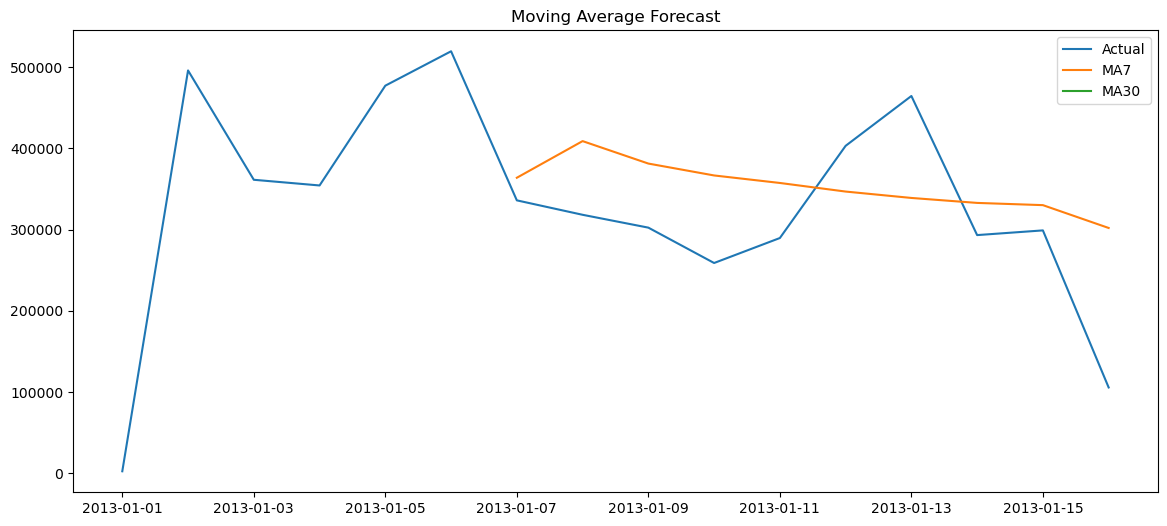

In [13]:
plt.figure(figsize=(14,6))
plt.plot(train_ma['date'], train_ma['sales'], label='Actual')
plt.plot(train_ma['date'], train_ma['MA7'], label='MA7')
plt.plot(train_ma['date'], train_ma['MA30'], label='MA30')
plt.legend()
plt.title("Moving Average Forecast")
plt.show()

TASK 3

In [14]:
df = train[['date','sales','onpromotion']].copy()
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['dayofweek'] = df['date'].dt.dayofweek
df = df.fillna(0)

In [16]:
X = df[['day','month','year','dayofweek','onpromotion']]
y = df['sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [17]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 287.4867353780082
MSE: 424470.1265612725
R2 Score: 0.0018906142173031881
